In [7]:
import sys
import pickle
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt

In [8]:
envron_data = pickle.load(open("./final_project_dataset_modified.pkl", "rb"))

In [9]:
print("Number of people in the Enron dataset: {0}".format(len(envron_data)))

Number of people in the Enron dataset: 143


In [10]:
""" Change data dictionary to pandas DataFrame"""
df = pd.DataFrame.from_records(list(envron_data.values()))
persons = pd.Series(list(envron_data.keys()))

In [11]:
df.head(5)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
0,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
1,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
2,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
3,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
4,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


In [12]:
persons.head(5)

0          METTS MARK
1       BAXTER JOHN C
2      ELLIOTT STEVEN
3    CORDES WILLIAM R
4      HANNON KEVIN P
dtype: object

In [13]:
pois = [x for x, y in envron_data.items() if y['poi']]
print('Number of POI\'s(Person of interests): {0}'.format(len(pois)))

Number of POI's(Person of interests): 16


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     143 non-null    object
 1   to_messages                143 non-null    object
 2   deferral_payments          143 non-null    object
 3   total_payments             143 non-null    object
 4   loan_advances              143 non-null    object
 5   bonus                      143 non-null    object
 6   email_address              143 non-null    object
 7   restricted_stock_deferred  143 non-null    object
 8   deferred_income            143 non-null    object
 9   total_stock_value          142 non-null    object
 10  expenses                   143 non-null    object
 11  from_poi_to_this_person    143 non-null    object
 12  exercised_stock_options    143 non-null    object
 13  from_messages              143 non-null    object
 14  other     

In [15]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,143,143,143,143,143,143,143,143,143,142,...,143,143,143,143,143,143,143,143,143,143
unique,92,85,38,123,3,39,110,18,44,122,...,56,99,64,90,40,2,50,82,95,17
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,59,106,21,141,64,34,126,96,19,...,59,44,59,53,59,127,80,59,36,127


In [16]:
""" Names of all users in the dataset """
envron_data.keys()

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [17]:
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments',
'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',
'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person',
'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi',
'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock',
                 'director_fees']

In [18]:
f = open('./poi_names.txt', 'r')

In [19]:
print('Columns:', list(df.columns.values))
print('Shape:', df.shape)
print('Number of POI in the dataset:', (df['poi']==1).sum())
print('Numbe of non-POI in the dataset:', (df['poi']==0).sum())

Columns: ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
Shape: (143, 21)
Number of POI in the dataset: 16
Numbe of non-POI in the dataset: 127


In [20]:
df.replace(to_replace='NaN', value=np.nan, inplace=True)

In [21]:
df.isnull().sum()

salary                        51
to_messages                   59
deferral_payments            106
total_payments                21
loan_advances                141
bonus                         64
email_address                 34
restricted_stock_deferred    126
deferred_income               96
total_stock_value             20
expenses                      51
from_poi_to_this_person       59
exercised_stock_options       44
from_messages                 59
other                         53
from_this_person_to_poi       59
poi                            0
long_term_incentive           80
shared_receipt_with_poi       59
restricted_stock              36
director_fees                127
dtype: int64

## Regression (Outlier Investigation)

In [22]:
## remove column from df if null counter > 65

for column, series in df.iteritems():
    if series.isnull().sum() > 65:
        df.drop(column, axis=1, inplace=True)

/var/folders/r8/__hqjl2n5j5_wf6w5j15gn300000gn/T/ipykernel_64420/2767730045.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in df.iteritems():


In [23]:
## remove email address column
if 'email_address' in list(df.columns.values):
    df.drop('email_address', axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary                   92 non-null     float64
 1   to_messages              84 non-null     float64
 2   total_payments           122 non-null    float64
 3   bonus                    79 non-null     float64
 4   total_stock_value        123 non-null    float64
 5   expenses                 92 non-null     float64
 6   from_poi_to_this_person  84 non-null     float64
 7   exercised_stock_options  99 non-null     float64
 8   from_messages            84 non-null     float64
 9   other                    90 non-null     float64
 10  from_this_person_to_poi  84 non-null     float64
 11  poi                      143 non-null    bool   
 12  shared_receipt_with_poi  84 non-null     float64
 13  restricted_stock         107 non-null    float64
dtypes: bool(1), float64(13)
me

In [25]:
# imputing the missing values
df_imp = df.replace(to_replace=np.nan, value=0)
df_imp = df.fillna(0).copy(deep=True)
df_imp.columns = list(df.columns.values)

In [26]:
df_imp.isnull().sum()

salary                     0
to_messages                0
total_payments             0
bonus                      0
total_stock_value          0
expenses                   0
from_poi_to_this_person    0
exercised_stock_options    0
from_messages              0
other                      0
from_this_person_to_poi    0
poi                        0
shared_receipt_with_poi    0
restricted_stock           0
dtype: int64

In [27]:
df_imp.head(10)

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock
0,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,False,702.0,585062.0
1,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,False,0.0,3942714.0
2,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,1788391.0
3,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,False,58.0,386335.0
4,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1035.0,853064.0
5,267093.0,0.0,628522.0,325000.0,208510.0,35018.0,0.0,0.0,0.0,1411.0,0.0,False,0.0,208510.0
6,0.0,232.0,1848227.0,0.0,955873.0,0.0,0.0,493489.0,28.0,0.0,0.0,False,22.0,462384.0
7,370448.0,2355.0,4099771.0,2600000.0,1662855.0,137108.0,58.0,1104054.0,48.0,297353.0,26.0,False,2228.0,558801.0
8,374125.0,4009.0,3859065.0,1150000.0,803094.0,76169.0,180.0,608750.0,1941.0,52382.0,61.0,False,1847.0,524169.0
9,197091.0,1238.0,1737629.0,400000.0,880290.0,43057.0,61.0,880290.0,222.0,778.0,48.0,False,742.0,409554.0


In [28]:
df.describe()

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock
count,9.200000e+01,84.000000,1.220000e+02,7.900000e+01,1.230000e+02,92.000000,84.000000,9.900000e+01,84.000000,9.000000e+01,84.000000,84.000000,1.070000e+02
mean,2.665288e+05,2029.190476,1.746408e+06,1.072704e+06,2.795166e+06,53966.097826,63.928571,2.477951e+06,621.571429,3.602622e+05,41.666667,1151.464286,9.669520e+05
std,1.319352e+05,2596.483254,2.496720e+06,1.198264e+06,4.654469e+06,46292.292167,87.747555,4.226731e+06,1861.165940,9.280942e+05,101.225304,1180.621793,1.751974e+06
min,4.770000e+02,57.000000,1.480000e+02,7.000000e+04,-4.409300e+04,148.000000,0.000000,3.285000e+03,12.000000,2.000000e+00,0.000000,2.000000,-2.604490e+06
25%,2.115140e+05,530.500000,3.701908e+05,4.125000e+05,4.676160e+05,22140.500000,10.000000,5.001270e+05,21.750000,1.197000e+03,1.000000,228.500000,2.437125e+05
50%,2.545700e+05,1136.000000,1.095882e+06,7.500000e+05,1.080988e+06,46547.500000,35.000000,1.104054e+06,41.000000,5.198450e+04,7.500000,733.500000,4.410960e+05
75%,3.042295e+05,2578.500000,2.039404e+06,1.125000e+06,2.497840e+06,78121.500000,66.250000,2.286940e+06,163.250000,3.440270e+05,24.250000,1759.250000,9.632520e+05
max,1.060932e+06,15149.000000,1.725253e+07,8.000000e+06,3.076606e+07,228763.000000,528.000000,3.076606e+07,14368.000000,7.427621e+06,609.000000,5521.000000,1.384707e+07


In [29]:
## queries of the dataset
envron_data['THE TRAVEL AGENCY IN THE PARK']

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 362096,
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 362096,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

In [30]:
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load(open("./final_project_dataset_modified.pkl", "rb"))
features_list = ["bonus", "salary"]
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

In [31]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

In [32]:
feature_train, feature_test, target_train, target_test = train_test_split(features,
                                                target, test_size=0.5, random_state=42)

In [33]:
train_color="b"
test_color="r"

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)
print('coef',reg.coef_)
print('intercept', reg.intercept_)

coef [1.97017287]
intercept 662220.417601581


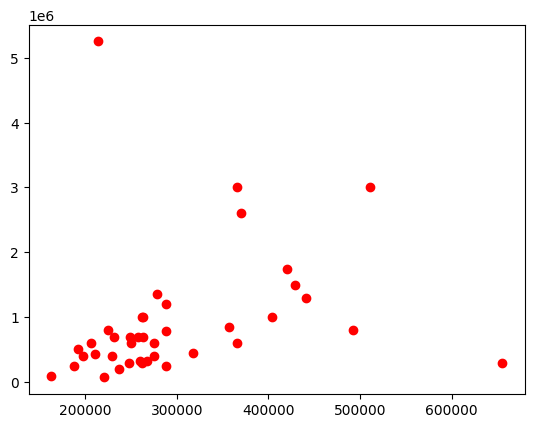

In [35]:
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)

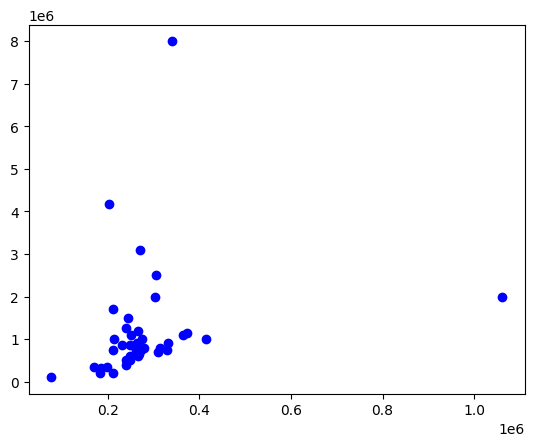

In [36]:
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)

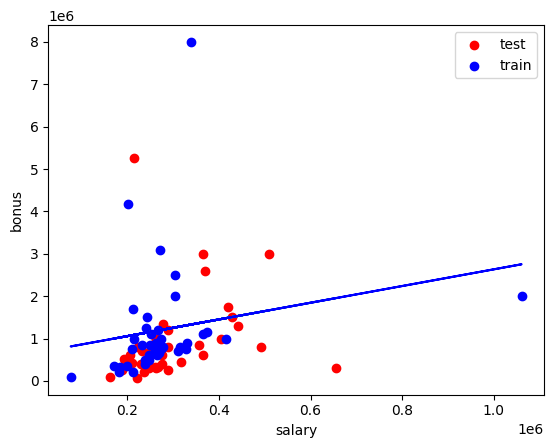

In [37]:
plt.scatter(feature_test, target_test, color=test_color, label='test')
plt.scatter(feature_train, target_train, color=train_color, label='train')
plt.plot(feature_test, reg.predict(feature_test))
plt.plot(feature_train, reg.predict(feature_train), color="b")
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [38]:
# dropping row for 'THE TRAVEL AGENCY IN THE PARK'
park_index = list(envron_data.keys()).index('THE TRAVEL AGENCY IN THE PARK')
print(park_index)
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

98


In [39]:
envron_data['LOCKHART EUGENE E']

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 'NaN',
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

In [40]:
df_imp_sub.head(5)

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock
0,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,False,702.0,585062.0
1,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,False,0.0,3942714.0
2,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,1788391.0
3,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,False,58.0,386335.0
4,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1035.0,853064.0


In [41]:
# droping row for 'LOCKHART EUGENE E'
lockhart_index = list(envron_data.keys()).index('LOCKHART EUGENE E')
print(lockhart_index)

89


In [42]:
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

In [43]:
df_imp_sub.head(5)

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock
0,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,False,702.0,585062.0
1,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,False,0.0,3942714.0
2,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,1788391.0
3,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,False,58.0,386335.0
4,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1035.0,853064.0


In [44]:
# Optimize Feature Selection/ Engineering
enron_df = df_imp_sub

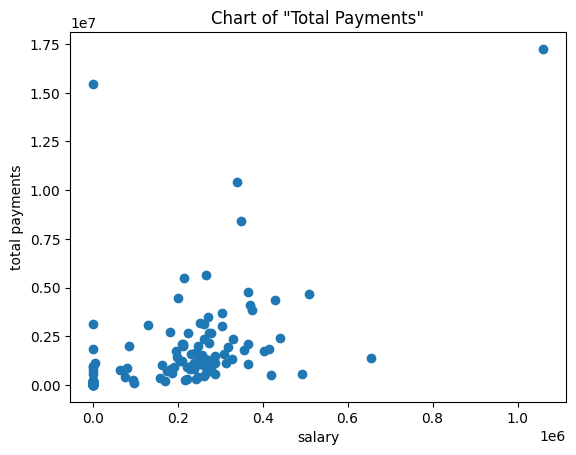

In [45]:
import matplotlib.pyplot as plt
plt.scatter (enron_df['salary'], enron_df['total_payments'])
plt.xlabel('salary')
plt.ylabel('total payments')
plt.title('Chart of "Total Payments"')
plt.show()

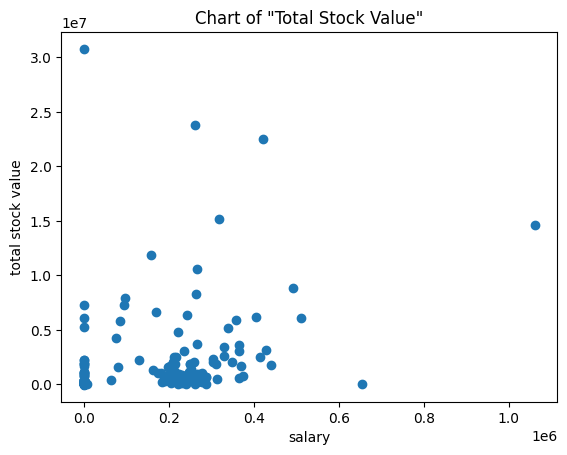

In [46]:
import matplotlib.pyplot as plt
plt.scatter (enron_df['salary'], enron_df['total_stock_value'])
plt.xlabel('salary')
plt.ylabel('total stock value')
plt.title('Chart of "Total Stock Value"')
plt.show()

In [47]:
enron_df[enron_df['total_stock_value'].isnull()]

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock


In [48]:
""" Creating new features 'salary_of_total_payments' and """
""" 'salary_of_total_stock' """

enron_df['salary_of_total_payments'] = 0.0
enron_df['salary_of_total_stock_value'] = 0.0
enron_df.loc[enron_df['total_payments'] != 0.0, 'salary_of_total_payments'] = enron_df['salary']/enron_df['total_payments']*100
enron_df.loc[enron_df['total_stock_value'] !=0, 'salary_of_total_stock_value'] = enron_df['salary']/enron_df['total_stock_value']*100

In [49]:
enron_df.head(5)

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock,salary_of_total_payments,salary_of_total_stock_value
0,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,False,702.0,585062.0,34.448926,62.521237
1,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,False,0.0,3942714.0,4.740606,2.514313
2,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,1788391.0,80.737277,2.559482
3,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,False,58.0,386335.0,0.000000,0.000000
4,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1035.0,853064.0,84.277163,3.806768


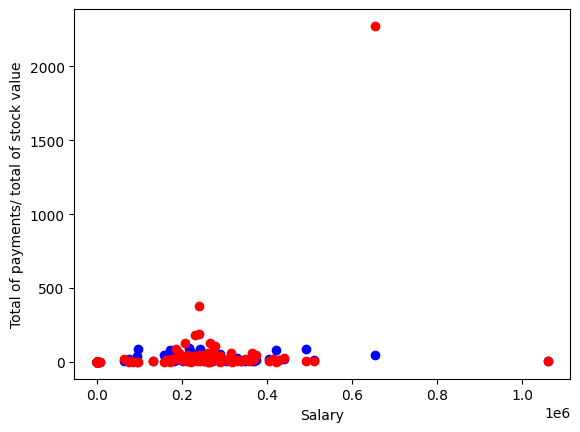

In [50]:
# Graph 'salary_of_total_payment' and 'salary_of_total_stock_value' to
# salary
plt.scatter(enron_df['salary'], enron_df['salary_of_total_payments'], color='blue')
plt.scatter(enron_df['salary'], enron_df['salary_of_total_stock_value'], color='red')
plt.xlabel('Salary')
plt.ylabel('Total of payments/ total of stock value')
plt.show()

In [51]:
## creating new features for email related features.
def outlierCleaner(predictions, ages, net_worths):
    cleaned_data= []
    for i in range(0, len(predictions)):
        age = ages[i][0]
        new_worth = net_worths[i][0]
        pred = predictions[i][0]
        err = net_worth - pred
        cleaned_data.append((age, net_worth, err))
        
    cleaned_data = sorted(cleaned_data, key=lambda x: x[2], reverse=True)
    print('length of cleaned_data: ', len(cleaned_data))
    return cleaned_data

In [52]:
enron_df['poi_ratio']=0.0
enron_df['fraction_to_poi']=0.0
enron_df['fraction_from_poi']=0.0

enron_df.loc[(enron_df['from_messages'] + enron_df['to_messages']) != 0.0, 'poi_ratio'] = (enron_df['from_poi_to_this_person'] \
         + enron_df['from_this_person_to_poi'])/(enron_df['from_messages'] + enron_df['to_messages'])*100
enron_df.loc[enron_df['from_messages'] != 0.0, 'fraction_to_poi'] = enron_df['from_this_person_to_poi']/enron_df['from_messages']*100
enron_df.loc[enron_df['to_messages'] != 0.0, 'fraction_from_pi'] = enron_df['from_poi_to_this_person']/enron_df['to_messages']*100

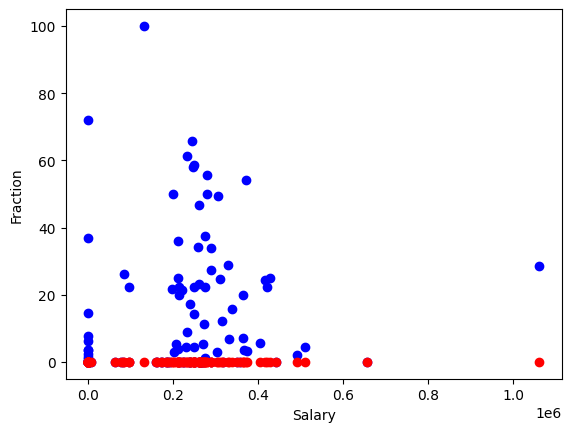

In [53]:
# Graph 'fraction_to_poi' and 'fraction_from_poi' to salary
plt.scatter(enron_df['salary'], enron_df['fraction_to_poi'], color='blue')
plt.scatter(enron_df['salary'], enron_df['fraction_from_poi'], color='red')
plt.xlabel('Salary')
plt.ylabel('Fraction')
plt.show()

In [54]:
# Moving 'poi' to the first column
cols = enron_df.columns.tolist()
cols = cols[7:8] + cols[:7] + cols[8:]
enron_df = enron_df[cols]

In [55]:
enron_df.columns.values

array(['exercised_stock_options', 'salary', 'to_messages',
       'total_payments', 'bonus', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'from_messages', 'other',
       'from_this_person_to_poi', 'poi', 'shared_receipt_with_poi',
       'restricted_stock', 'salary_of_total_payments',
       'salary_of_total_stock_value', 'poi_ratio', 'fraction_to_poi',
       'fraction_from_poi', 'fraction_from_pi'], dtype=object)

In [56]:
enron_df.head(5)

,exercised_stock_options,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock,salary_of_total_payments,salary_of_total_stock_value,poi_ratio,fraction_to_poi,fraction_from_poi,fraction_from_pi
0,0.0,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,29.0,1740.0,1.0,False,702.0,585062.0,34.448926,62.521237,4.665072,3.448276,0.0,4.708798
1,6680544.0,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,0.0,2660303.0,0.0,False,0.0,3942714.0,4.740606,2.514313,0.000000,0.000000,0.0,NaN
2,4890344.0,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,0.0,12961.0,0.0,False,0.0,1788391.0,80.737277,2.559482,0.000000,0.000000,0.0,NaN
3,651850.0,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,12.0,0.0,0.0,False,58.0,386335.0,0.000000,0.000000,1.288660,0.000000,0.0,1.308901
4,5538001.0,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,32.0,11350.0,21.0,True,1035.0,853064.0,84.277163,3.806768,4.921077,65.625000,0.0,3.062201


In [57]:
enron_df.describe()

,exercised_stock_options,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock,salary_of_total_payments,salary_of_total_stock_value,poi_ratio,fraction_to_poi,fraction_from_poi,fraction_from_pi
count,1.420000e+02,1.420000e+02,142.000000,1.420000e+02,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.0,84.000000
mean,1.727585e+06,1.726806e+05,1200.366197,1.497885e+06,5.967860e+05,2.421165e+06,34963.950704,37.816901,367.690141,2.257853e+05,24.647887,681.147887,7.286187e+05,15.198587,35.821064,2.844448,10.638415,0.0,3.823534
std,3.704389e+06,1.659968e+05,2229.457770,2.393296e+06,1.039388e+06,4.433593e+06,45300.747867,74.342949,1460.502581,7.578048e+05,80.337515,1069.172948,1.575560e+06,20.375767,194.171876,4.312736,18.454284,0.0,4.098911
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-4.409300e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-2.604490e+06,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,8.839225e+04,0.000000e+00,2.288695e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,8.115000e+03,0.000000,0.000000,0.000000,0.000000,0.0,0.887105
50%,6.046375e+05,2.083105e+05,289.000000,9.138250e+05,2.750000e+05,9.551135e+05,18094.500000,2.500000,16.500000,8.825000e+02,0.000000,102.500000,3.535955e+05,9.792470,5.889988,0.787407,0.000000,0.0,2.584537
75%,1.636585e+06,2.670998e+05,1513.000000,1.863625e+06,8.000000e+05,2.218031e+06,52905.250000,39.750000,51.250000,1.454285e+05,12.750000,871.500000,6.892030e+05,21.593596,22.361452,4.367335,16.995688,0.0,5.654326
max,3.076606e+07,1.060932e+06,15149.000000,1.725253e+07,8.000000e+06,3.076606e+07,228763.000000,528.000000,14368.000000,7.427621e+06,609.000000,5521.000000,1.384707e+07,94.795031,2274.591986,22.435175,100.000000,0.0,21.734104


In [58]:
## setting up label, features and predictors
predictors = enron_df.drop('poi', axis=1).columns.values
print(predictors)

['exercised_stock_options' 'salary' 'to_messages' 'total_payments' 'bonus'
 'total_stock_value' 'expenses' 'from_poi_to_this_person' 'from_messages'
 'other' 'from_this_person_to_poi' 'shared_receipt_with_poi'
 'restricted_stock' 'salary_of_total_payments'
 'salary_of_total_stock_value' 'poi_ratio' 'fraction_to_poi'
 'fraction_from_poi' 'fraction_from_pi']


In [59]:
enron_df_rep = enron_df.replace(to_replace=np.nan, value=0)
enron_df_rep = enron_df.fillna(0).copy(deep=True)

In [60]:
## selecting features
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold

selector = SelectKBest(f_classif, k=5)
selector.fit(enron_df_rep[predictors], enron_df['poi'])

scores  = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]
sorted_important_features = []
for i in indices:
    sorted_important_features.append(predictors[i])

/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


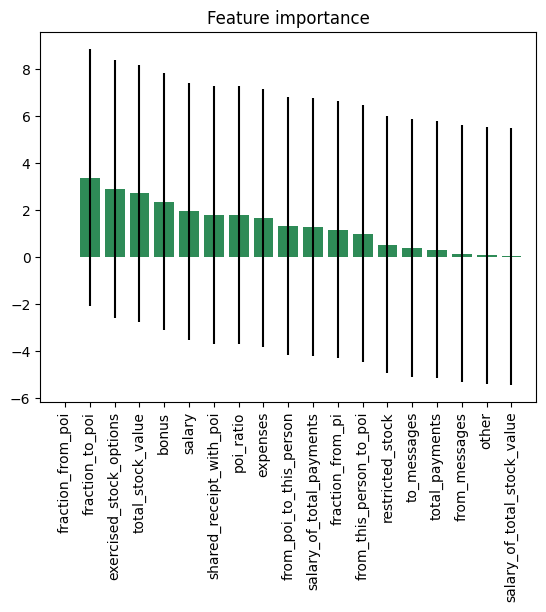

In [61]:
# plot the scores
plt.figure()
plt.title("Feature importance")
plt.bar(range(np.size(predictors)), scores[indices], color="seagreen",
        yerr=np.std([indices]), align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features,
           rotation="vertical")
plt.xlim([-1, np.size(predictors)])
plt.show()

In [62]:
# 13 features
predictors = ['bonus', 'exercised_stock_options', 'expenses', 
    'from_poi_to_this_person', 'from_this_person_to_poi', 'restricted_stock',
    'salary', 'shared_receipt_with_poi', 'total_stock_value', 'poi_ratio',
    'fraction_to_poi', 'fraction_from_poi', 'salary_of_total_payments']

# 8 features
predictors_8 = ['bonus', 'exercised_stock_options', 'total_stock_value',
    'fraction_to_poi', 'expenses', 'salary', 'shared_receipt_with_poi',
    'poi_ratio']

# 4 features
predictors_4 = ['bonus', 'exercised_stock_options', 'total_stock_value', 
                'fraction_to_poi']

In [63]:
### split the data on training and test data.
labels = enron_df['poi'].copy(deep=True).astype(int).to_numpy()
features = (enron_df[predictors]).fillna(0).copy(deep=True).to_numpy()

In [64]:
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [65]:
features.shape

(142, 13)

In [66]:
# Scaling features
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)
salary_scaled = scaler.fit_transform(b.values.reshape(-1,1))

NameError: name 'b' is not defined

In [67]:
b = np.reshape(enron_df['salary'], (np.product(enron_df['salary'].shape),))
b.shape

(142,)

In [68]:
## GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
scores = sklearn.model_selection.cross_val_score(gnb_clf, enron_df[predictors_8], labels)
print(scores)
print('GaussianNB mean score:', scores.mean())

[0.86206897 0.82758621 0.85714286 0.78571429 0.78571429]
GaussianNB mean score: 0.8236453201970443


In [69]:
## Support Vector Machines
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc_clf = SVC()
scores = cross_val_score(svc_clf, enron_df[predictors_8], labels)
print(scores)
print('SVC mean score: ', scores.mean())

[0.89655172 0.86206897 0.89285714 0.89285714 0.85714286]
SVC mean score:  0.880295566502463


In [70]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
scores = cross_val_score(rf_clf, enron_df[predictors_8], labels)
print(scores)
print('RandomForest classifier mean score: ', scores.mean())

[0.89655172 0.89655172 0.89285714 0.89285714 0.78571429]
RandomForest classifier mean score:  0.8729064039408867


In [71]:
# extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier

erf_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(erf_clf, enron_df[predictors_8], labels)
print(scores)
print('ExtraTreeClassifier mean score: ', scores.mean())

[0.86206897 0.86206897 0.89285714 0.89285714 0.82142857]
ExtraTreeClassifier mean score:  0.8662561576354679


In [72]:
## AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(adb_clf, enron_df[predictors_8], labels)
print(scores)
print('AdaBoostClassifier mean score: ', scores.mean())

[0.86206897 0.82758621 0.85714286 0.85714286 0.67857143]
AdaBoostClassifier mean score:  0.8165024630541872


In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lreg_clf = LogisticRegression()
scores = cross_val_score(lreg_clf, enron_df[predictors_8], labels)
print(scores)
print('AdaBoostClassifier mean score: ', scores.mean())

[0.79310345 0.68965517 0.78571429 0.82142857 0.75      ]
AdaBoostClassifier mean score:  0.7679802955665025


## Univariate feature selection with F-test for feature scoring

In [74]:
from sklearn.feature_selection import SelectPercentile, f_classif

/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


<BarContainer object of 13 artists>

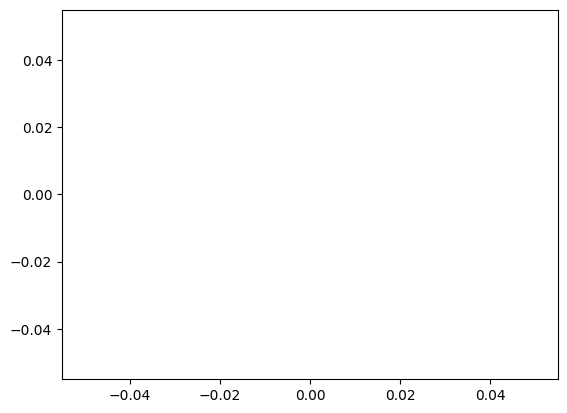

In [75]:
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features, labels)
scores = -np.log(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(features.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,label=r'Univariate score ($-Log(p_[value])&)', color='green')

In [76]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [77]:
pca = PCA(n_components=8)
selection = SelectKBest(k=4)

In [78]:
# Building an estimator from PCA and univariate seletion:
combined_features = FeatureUnion([('pca', pca), ('univ_select', selection)])

# Using combined features to transform dataset:
X_features = combined_features.fit(features, labels).transform(features)

/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [79]:
svm = SVC(kernel="linear")
pipeline = Pipeline([("features", combined_features), ("svm", svm)])

In [80]:
param_grid = dict(features__pca__n_components=[1,2,3],
                  features__univ_select__k=[1,2],
                  svm__C=[0.1, 1, 10])

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(features, labels)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1


/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## pipeline for extracting features from the data using PCA and SelectKBest and then creates a model_SVC

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
#from sklearn.grid_search import GridSearchCV

In [ ]:
# Creating feature union
features_pipeline = []
features_pipeline.append(('pca', PCA(n_components=4)))
features_pipeline.append(('select_best', SelectKBest(k=8)))
feature_union = FeatureUnion(features_pipeline)

In [5]:
# creating a pipeline for rbfSVC
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('svc', SVC(kernel='rbf', class_weight='balanced')))
model_svc=Pipeline(estimators)

param_grid = {
    'svc__C': [1e3, 5e3, 1e4, 5e4, 1e5],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
    'svc__degree': [1, 2, 3, 4, 5]
}

grid_svc = GridSearchCV(model_svc, param_grid)
grid_svc = grid_svc.fit(features, labels)
print(grid_svc.best_estimator_)

NameError: name 'features' is not defined

In [6]:
best_svc_pipe = grid_svc.best_estimator_

# evaluating pipeline for rbfSVC
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
scores_svc = cross_val_score(model_svc, enron_df[predictors], labels, cv=kfold)
print('rbfSVC mean score:', scores_svc.mean())

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## Creating pipeline for RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('RandomForest', RandomForestClassifier()))
model_rf=Pipeline(estimators)
print(sorted(model_rf.get_params().keys()))

In [ ]:
""" Finding the best fitting parameter """
param_grid = {
    'RandomForest__n_estimators': [10, 20, 30, 40, 50],
    'RandomForest__min_samples_split': [2, 3, 4, 5],
    'RandomForest__min_samples_leaf': [1, 2, 3]
}

grid_rf = GridSearchCV(model_rf, param_grid)
grid_rf = grid_rf.fit(features, labels)
print(grid_rf.best_estimator_)

# Best fitting svc_clf
best_rf_pipe = grid_rf.best_estimator_

# evaluating pipeline for rf
seed=7
kfold = KFold(n_splits=10, random_state=seed)
scores_rf = cross_val_score(model_rf, enron_df[predictors], labels, cv=kfold)
print('RandomForest mean score:', score_rf.mean())

## Finding best fit parameter for SVM(kernel='rbf') with PCA and cross validation

In [ ]:
from sklearn.decompostion import PCA
from sklearn.grid_search import GridSearchCV

In [ ]:
pca = PCA(n_components=4).fit(features)
features_transformed=pca.transform(features)
feature_pca=pca.components_

print('features_transformed[0]:', features_transformed[0])
print('features_pca[0]: ', features_pca[0])

In [ ]:
# training a svm classification model

param_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
             'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
             'degree': [1,2,3,4,5]}
}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), pram_grid)
clf = clf.fit(features_transformed, labels)
pred_svc = clf.predict(features_transformed)

print(clf.best_estimator_)
best_svc_clf = clf.best_estimator_

In [ ]:
scores = cross_val_score(best_svc_clf, features, labels)
print('SVC after PCA mean score:', score.mean())

In [ ]:
pred_svc = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef=0.0,
    decision_function_shape=None, degree=1, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(features_transformed,
                    labels).predict(feature_transformed)

print(pred_svc)

In [ ]:
### Getting the best-fit